In [ ]:
notes_dict = {
    "C:min":[12,24,27,31],
    "D:min":[26,29,33],
    "E:min":[28,31,35],
    "F:min":[29,32,36],
    "G:min":[31,34,38],
    "A:min":[21,24,28],
    "B:min":[23,26,30],
    "C:maj":[24,28,31],
    "D:maj":[26,30,33],
    "E:maj":[28,32,35],
    "F:maj":[29,33,36],
    "G:maj":[31,35,38],
    "A:maj":[21,25,28],
    "B:maj":[23,27,30],
    "N":[0,0,0],
    "C#:min":[25,28,32],
    "D#:min":[27,30,34],
    "E#:min":[29,32,36],
    "F#:min":[30,33,37],
    "G#:min":[32,35,39],
    "A#:min":[22,25,29],
    "B#:min":[24,27,31],
    "C#:maj":[25,29,32],
    "D#:maj":[27,31,34],
    "E#:maj":[29,33,36],
    "F#:maj":[30,34,37],
    "G#:maj":[32,36,39],
    "A#:maj":[22,26,29],
    "B#:maj":[24,28,31]
}

In [ ]:
import pretty_midi
import numpy as np
# For plotting
import mir_eval.display
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline
# For putting audio in the notebook
import IPython.display
import pypianoroll

In [ ]:
quarter_reso = 2     # 4部音符の解像度 
quaver_reso  = quarter_reso//2 #8部音符の解像度 
bar_reso     = quarter_reso * 4 # 1小節の解像度
bar_num      = 8     # 小節数
all_reso     = bar_num * bar_reso
tempo        = 120    #bpm

pitch_reso = 128

tempos = tempo*np.ones( [all_reso,1] )

In [ ]:
multitrack   = pypianoroll.Multitrack(resolution=quarter_reso,tempo=tempos)

### make chord track

In [ ]:
track1 = pypianoroll.StandardTrack(name="piano",program=0,is_drum=False)
multitrack.tracks.append(track1)

In [ ]:
chords = ["C:maj","G:maj","A:min","E:min","F:maj","C:maj","F:maj","G:maj"]

In [ ]:
描画

In [ ]:
pianoroll = np.zeros( [all_reso,pitch_reso] ,dtype=np.uint8)
for bar in range(8):
    start =   bar * bar_reso
    end   = ( bar+1 )*bar_reso
    
    chord = notes_dict[chords[bar]]
    pianoroll[start:end,chord] = 127
    
track1.pianoroll = pianoroll

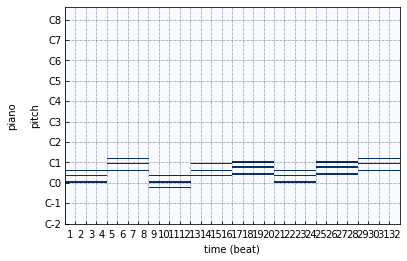

In [ ]:
#plt.figure()
multitrack.plot()

### make melody track

####  make motif

In [ ]:
#8部(20%) 4部(60%) or ４部休符(10%) or 8部休符(10%)

In [ ]:
events_choice = {"quarter_note":0.6,"quaver_note":0.3,"quarter_rest":0.05,"quaver_rest":0.05}

events_array  = {"quarter_note":[quarter_reso,127],"quaver_note":[quaver_reso,127],
                 "quarter_rest":[quarter_reso,0],  "quaver_rest":[quaver_reso,0]  }

pentas_choice = {36+12*2:0.2,38+12*2:0.2,40+12*2:0.2,43+12*2:0.2,45+12*2:0.2} #[ド，レ，ミ，ソ，ラ]

In [ ]:
#motief
bar_pianoroll = np.zeros([bar_reso,pitch_reso])
events_list = []
note_start = 0
note_end   = 0

while 1:
    event = np.random.choice(list( events_choice.keys()) ,p=list(events_choice.values()),replace=True)
    note_dulation,note_velocity =  events_array[event]
    note_end   = note_start + note_dulation

    if (note_end) >= bar_reso:
        break 
    
    pitch = np.random.choice( list(pentas_choice.keys()),p=list(pentas_choice.values()),replace=True)
    bar_pianoroll[note_start:note_end,pitch] = note_velocity
    note_start = note_end
    events_list.append([event,pitch])

In [ ]:
verse = np.tile(bar_pianoroll,(3,1))

In [ ]:
#oti
bar_pianoroll = np.zeros([bar_reso,pitch_reso])
events_list = []
note_start = 0
note_end   = 0

while 1:
    event = np.random.choice(list( events_choice.keys()) ,p=list(events_choice.values()),replace=True)
    note_dulation,note_velocity =  events_array[event]
    note_end   = note_start + note_dulation

    if (note_end) >= bar_reso:
        break 
    
    pitch = np.random.choice( list(pentas_choice.keys()),p=list(pentas_choice.values()),replace=True)
    bar_pianoroll[note_start:note_end,pitch] = note_velocity
    note_start = note_end
    events_list.append([event,pitch])

In [ ]:
verse_break = bar_pianoroll

In [ ]:
pianoroll = np.concatenate([verse_pre,verse_break])
pianoroll = np.tile(pianoroll,(2,1))
track2 = pypianoroll.StandardTrack(name="piano",program=12,is_drum=False)

In [ ]:
multitrack.tracks.append(track2)
track2.pianoroll = pianoroll

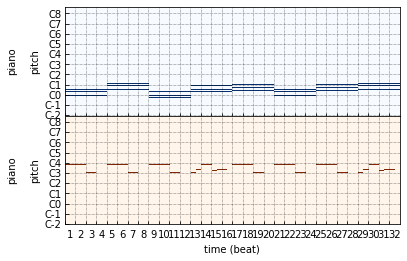

In [ ]:
multitrack.plot()

In [ ]:
pm = multitrack.to_pretty_midi()

In [ ]:
IPython.display.Audio(pm.fluidsynth(fs=16000), rate=16000)

In [ ]:
pm = pretty_midi.PrettyMIDI(initial_tempo=80)

In [ ]:
inst = pretty_midi.Instrument(program=33, is_drum=False, name='my guitar')
pm.instruments.append(inst)

In [ ]:
# Let's add a few notes to our instrument
velocity = 100
for pitch, start, end in zip([60, 62, 64], [0.2, 0.6, 1.0], [1.1, 1.7, 2.3]):
    inst.notes.append(pretty_midi.Note(velocity, pitch, start, end))
print(inst.notes)

[Note(start=0.200000, end=1.100000, pitch=60, velocity=100), Note(start=0.600000, end=1.700000, pitch=62, velocity=100), Note(start=1.000000, end=2.300000, pitch=64, velocity=100)]


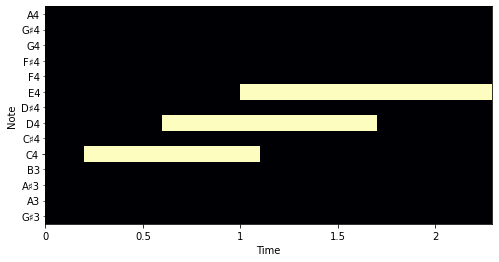

In [ ]:
def plot_piano_roll(pm, start_pitch, end_pitch, fs=100):
    # Use librosa's specshow function for displaying the piano roll
    librosa.display.specshow(pm.get_piano_roll(fs)[start_pitch:end_pitch],
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
                             fmin=pretty_midi.note_number_to_hz(start_pitch))

plt.figure(figsize=(8, 4))
plot_piano_roll(pm, 56, 70)
# Note the blurry section between 1.5s and 2.3s - that's the pitch bending up!

In [ ]:
# Create a PrettyMIDI object
cello_c_chord = pretty_midi.PrettyMIDI()
# Create an Instrument instance for a cello instrument
cello_program = pretty_midi.instrument_name_to_program('Cello')
cello = pretty_midi.Instrument(program=cello_program)
# Iterate over note names, which will be converted to note number later
for note_name in ['C5', 'E5', 'G5']:
    # Retrieve the MIDI note number for this note name
    note_number = pretty_midi.note_name_to_number(note_name)
    # Create a Note instance, starting at 0s and ending at .5s
    note = pretty_midi.Note(
        velocity=100, pitch=note_number, start=0, end=.5)
    # Add it to our cello instrument
    cello.notes.append(note)
# Add the cello instrument to the PrettyMIDI object
cello_c_chord.instruments.append(cello)
# Write out the MIDI data
cello_c_chord.write('cello-C-chord.mid')

/home/hyusuke/.venv/ai-music/lib/python3.8/site-packages/librosa/display.py:1335: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  warnings.warn(


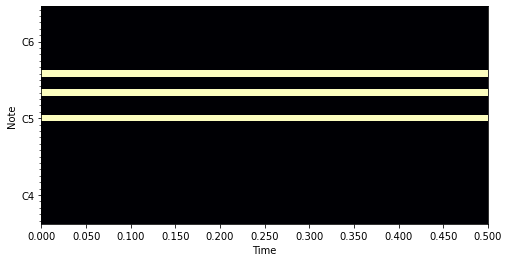

In [ ]:

plt.figure(figsize=(8, 4))
plot_piano_roll(cello_c_chord, 56, 90)

In [ ]:
IPython.display.Audio(cello_c_chord.fluidsynth(fs=16000), rate=16000)
# Sounds (kind of) like a cello!